In [1]:
H1=300
H2=180
V=25
R1 = 68*H1*V
R2 = 68*H2*V
R1

510000

In [5]:
R2

306000

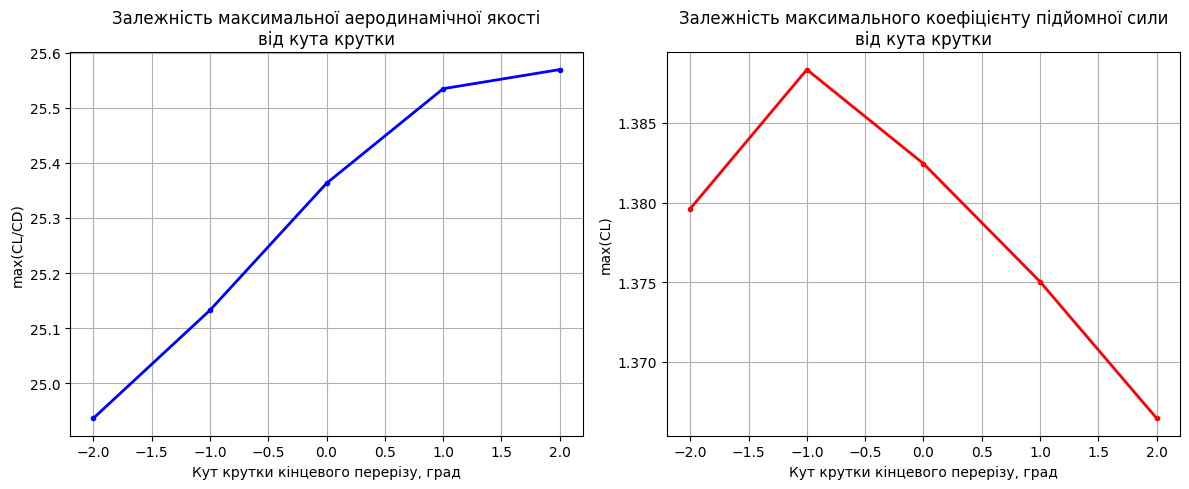


Результати аналізу:

Залежність max(CL/CD) від кута крутки:
Кут крутки -2°: 24.94
Кут крутки -1°: 25.13
Кут крутки  0°: 25.36
Кут крутки  1°: 25.53
Кут крутки  2°: 25.57

Залежність max(CL) від кута крутки:
Кут крутки -2°: 1.380
Кут крутки -1°: 1.388
Кут крутки  0°: 1.382
Кут крутки  1°: 1.375
Кут крутки  2°: 1.366

Оптимальний кут крутки за критерієм max(CL/CD): 2°
Оптимальний кут крутки за критерієм max(CL): -1°


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_file(filename):
    # Читаємо дані з файлу
    data = []
    with open(filename, 'r') as f:
        lines = f.readlines()
        # Пропускаємо заголовки
        for line in lines[8:]:
            if line.strip():
                values = line.split()
                if len(values) >= 6:
                    alpha = float(values[0])
                    CL = float(values[2])
                    CD = float(values[5])
                    data.append([alpha, CL, CD])

    data = np.array(data)

    # Розрахунок CL/CD
    efficiency = data[:, 1] / data[:, 2]
    max_efficiency = np.max(efficiency)

    # Знаходження максимального CL
    max_CL = np.max(data[:, 1])

    return max_efficiency, max_CL

# Аналіз всіх файлів
twists = [-2, -1, 0, 1, 2]
max_efficiencies = []
max_CLs = []

for twist in twists:
    filename = f'T1-25_0 m_s-LLT-twist_{twist}.txt'
    max_eff, max_cl = analyze_file(filename)
    max_efficiencies.append(max_eff)
    max_CLs.append(max_cl)

# Побудова графіків
plt.figure(figsize=(12, 5))

# Графік залежності max(CL/CD) від кута крутки
plt.subplot(1, 2, 1)
plt.plot(twists, max_efficiencies, 'b.-', linewidth=2)
plt.grid(True)
plt.xlabel('Кут крутки кінцевого перерізу, град')
plt.ylabel('max(CL/CD)')
plt.title('Залежність максимальної аеродинамічної якості\nвід кута крутки')

# Графік залежності max(CL) від кута крутки
plt.subplot(1, 2, 2)
plt.plot(twists, max_CLs, 'r.-', linewidth=2)
plt.grid(True)
plt.xlabel('Кут крутки кінцевого перерізу, град')
plt.ylabel('max(CL)')
plt.title('Залежність максимального коефіцієнту підйомної сили\nвід кута крутки')

plt.tight_layout()
plt.show()

# Виведення результатів
print("\nРезультати аналізу:")
print("\nЗалежність max(CL/CD) від кута крутки:")
for twist, eff in zip(twists, max_efficiencies):
    print(f"Кут крутки {twist:2d}°: {eff:.2f}")

print("\nЗалежність max(CL) від кута крутки:")
for twist, cl in zip(twists, max_CLs):
    print(f"Кут крутки {twist:2d}°: {cl:.3f}")

# Знаходження оптимальних значень
opt_twist_eff = twists[np.argmax(max_efficiencies)]
opt_twist_cl = twists[np.argmax(max_CLs)]

print(f"\nОптимальний кут крутки за критерієм max(CL/CD): {opt_twist_eff}°")
print(f"Оптимальний кут крутки за критерієм max(CL): {opt_twist_cl}°")